In [ ]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


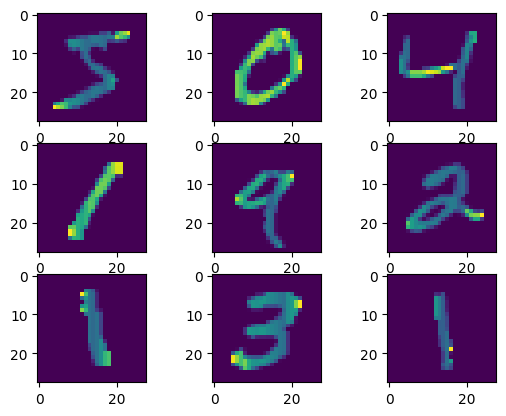

In [ ]:
# plotting the first 9 images in the train set of MNIST

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # input layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8171 - loss: 0.7191 - val_accuracy: 0.9386 - val_loss: 0.2034
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9507 - loss: 0.1668 - val_accuracy: 0.9571 - val_loss: 0.1452
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9671 - loss: 0.1127 - val_accuracy: 0.9613 - val_loss: 0.1281
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9756 - loss: 0.0843 - val_accuracy: 0.9650 - val_loss: 0.1100
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9815 - loss: 0.0613 - val_accuracy: 0.9701 - val_loss: 0.0990
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9712 - val_loss: 0.0942
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9894 - loss: 0.0375 - val_accuracy: 0.9721 - val_loss: 0.0954
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1057
0.09161601215600967
0.973800003528595


In [ ]:
prediction = model.predict([X_test])
prediction

 60/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


array([[6.0702783e-11, 3.4055954e-09, 2.8849655e-07, ..., 9.9999863e-01,
        1.1222047e-09, 7.8321785e-09],
       [1.6451654e-11, 3.6199293e-05, 9.9996370e-01, ..., 1.9354177e-13,
        1.3952423e-09, 9.2786080e-17],
       [2.7382278e-08, 9.9998313e-01, 1.0903871e-06, ..., 3.5473950e-06,
        1.1712719e-05, 2.7977238e-09],
       ...,
       [3.2761158e-13, 7.6844225e-10, 7.6497673e-13, ..., 5.3723177e-08,
        9.2702317e-09, 3.3768705e-05],
       [4.3353713e-11, 5.8023829e-12, 1.7972466e-13, ..., 1.0845019e-10,
        3.1522322e-06, 5.2770033e-13],
       [5.5383955e-09, 3.0735196e-11, 2.4874378e-10, ..., 3.2606331e-13,
        5.4304135e-09, 2.3891655e-12]], dtype=float32)

In [ ]:
# let us do prediction for single image

print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.9994081e-01 5.9417804e-08 5.6137134e-05 1.4887665e-10 7.9231288e-11
 1.2775513e-08 1.5333197e-07 1.1939684e-07 9.1734231e-11 2.6748598e-06]


Prediction:  0


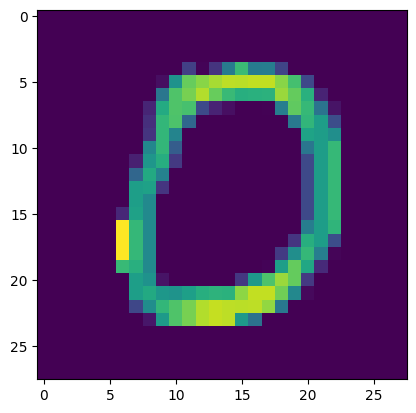

In [ ]:
# visualize the image

plt.imshow(X_test[10])
plt.show()

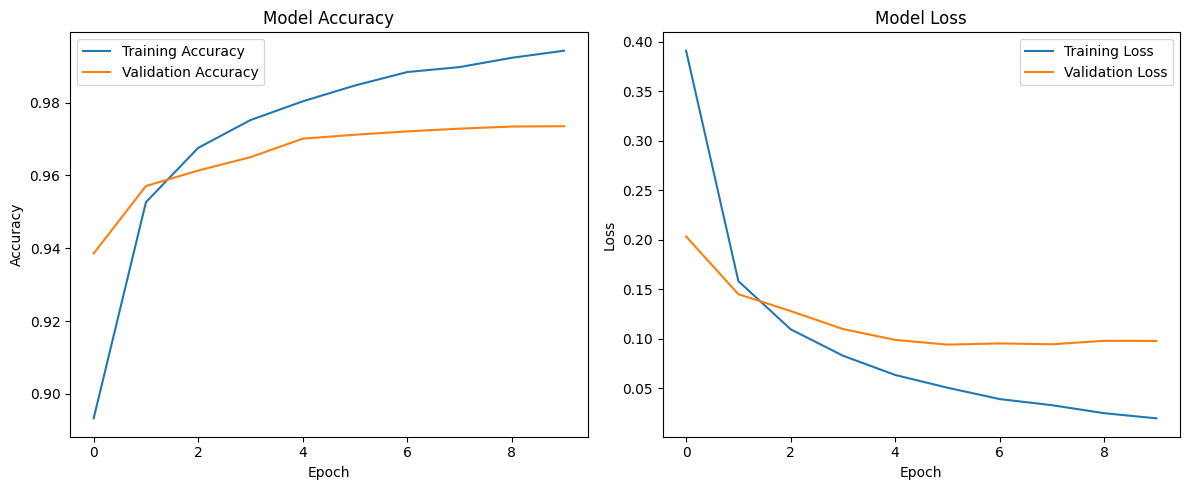

In [ ]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.0916
Test Accuracy: 0.9738

Sample Prediction:
Probabilities:  [9.9994081e-01 5.9417804e-08 5.6137134e-05 1.4887665e-10 7.9231288e-11
 1.2775513e-08 1.5333197e-07 1.1939684e-07 9.1734231e-11 2.6748598e-06]
Predicted Digit:  0


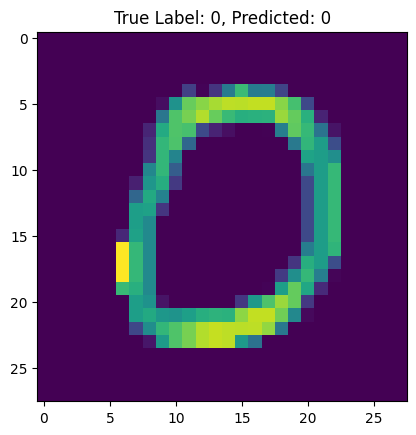

In [ ]:
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Display a sample prediction
print('\nSample Prediction:')
print('Probabilities: ', prediction[10])
print('Predicted Digit: ', np.argmax(prediction[10]))

plt.imshow(X_test[10])
plt.title(f"True Label: {y_test[10]}, Predicted: {np.argmax(prediction[10])}")
plt.show()

mnist_architecture.svg